<a href="https://colab.research.google.com/github/Zarif-SBU/reinforcement_Learning/blob/main/REINFORCE_and_Actor_Critic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REINFORCE and Actor-Critic
The goal is to implement REINFORCE and Actor-Critic

4 Gymnasium environments are used (InvertedPendulum-v4, Hopper-v4, HalfCheetah-v4, and image-based InvertedPendulum-v4).


In [ ]:
!apt install xvfb -y
!pip install gymnasium[classic-control,atari,accept-rom-license,mujoco]
!pip install opencv-python
%env MUJOCO_GL=egl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
import imageio
from IPython.display import Image, display
from io import BytesIO

# Code for visualizing the episode

class GIFMaker:
    def __init__(self):
        self.reset()

    def reset(self):
        self.images = []
        self.buffer = BytesIO()

    def append(self, img):
        self.images.append(img)

    def display(self):
        imageio.mimsave(self.buffer, self.images, format='gif')
        gif = Image(data=self.buffer.getvalue())
        display(gif)
        return gif

    def __len__(self):
      return len(self.images)

## Env1 InvertedPendulum
Detailed information of this environment:
https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/

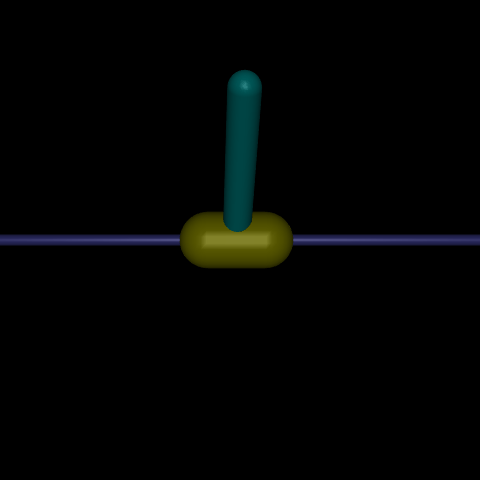

In [ ]:
import gymnasium as gym
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")
g = GIFMaker() # visualization
observation, info = env.reset(seed=42)
for i in range(500):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(i, action, observation, reward)
    g.append(env.render()) # save one frame
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display() # show GIF animation
env.close()

## Env2 Hopper-v4
Detailed information of this environment:
https://gymnasium.farama.org/environments/mujoco/hopper/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


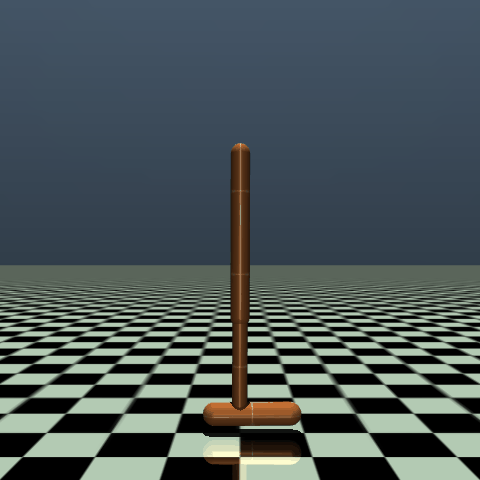

In [ ]:
env = gym.make("Hopper-v4", render_mode="rgb_array")

observation, info = env.reset(seed=42)
g = GIFMaker()
for i in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(i, action, observation, reward)
    g.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display()
env.close()

## Env3 HalfCheetah-v4
Detailed information of this environment: https://gymnasium.farama.org/environments/mujoco/half_cheetah/

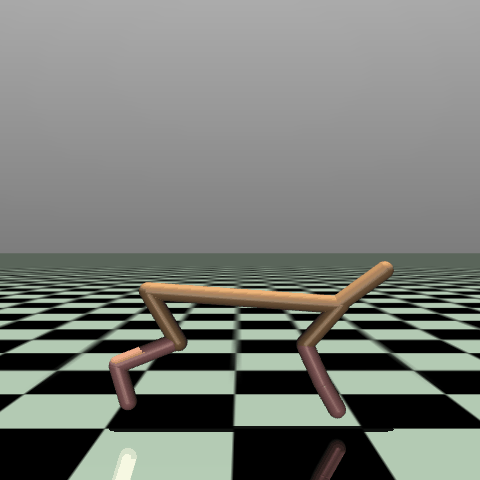

In [ ]:
env = gym.make("HalfCheetah-v4", render_mode="rgb_array")

observation, info = env.reset(seed=42)
g = GIFMaker()
for i in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(i, action, observation, reward)
    g.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display()
env.close()

## Env4 *Image-based* InvertedPendulum
Detailed information of this environment: https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/

In [ ]:
from gymnasium import ObservationWrapper
from gymnasium.wrappers import (
    PixelObservationWrapper,
    GrayScaleObservation,
    ResizeObservation
)
from gymnasium.spaces import Box

class KeyObservationWrapper(ObservationWrapper):
    def __init__(self, env: gym.Env):
        gym.ObservationWrapper.__init__(self, env)
        self.observation_space = self.observation_space['pixels']

    def observation(self, observation):
        return observation['pixels']

class MakeChannelObservationWrapper(ObservationWrapper):
    def __init__(self, env: gym.Env):
        gym.ObservationWrapper.__init__(self, env)
        self.observation_space = Box(
            low = self.observation_space.low[np.newaxis, :],
            high = self.observation_space.high[np.newaxis, :],
            shape = (1,) + self.observation_space.shape,
            dtype = self.observation_space.dtype
        )

    def observation(self, observation):
        return observation[np.newaxis, :]


def make_image_env(env_name):
    env = gym.make(env_name, render_mode="rgb_array")
    env = PixelObservationWrapper(env)
    env = KeyObservationWrapper(env)
    env = GrayScaleObservation(env)
    env = ResizeObservation(env, (84, 84))
    env = MakeChannelObservationWrapper(env)
    return env

env = make_image_env("InvertedPendulum-v4")
observation, info = env.reset(seed=42)
print (observation.shape)
g = GIFMaker()
for i in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # this observation gives you (1, 84, 84), 1 means one gray channel
    # print(i, action, observation, reward)
    # g.append(env.render()) # original rgb frames
    g.append(observation.squeeze(0))    # see the image observations
    if terminated or truncated:
        observation, info = env.reset()
        break
g.display()
env.close()

NameError: ignored

##Import packages we need

In [ ]:
import os
import gc
import math
import random

from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import deque

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.normal import Normal

import cv2

##REINFORCE

In [ ]:
# The policy network for numerical states using MLP
class Policy(nn.Module):
    def __init__(
        self,
        state_dim,
        action_dim
    ):
        super(Policy, self).__init__()
        print(state_dim, action_dim)

        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        x = F.tanh(x) # scale the final output to [-1, 1]; And we treat it as the mean value of a (multi-variable) normal distribution
        return x

# The policy network for **image observations** using CNN
class Policy_Image(nn.Module):
    def __init__(
        self,
        image_channels,
        action_dim
    ):
        super(Policy_Image, self).__init__()
        self.conv1 = nn.Conv2d(image_channels, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output of conv layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.tanh(x) # scale the final output to [-1, 1]; And we treat it as the mean value of a (multi-variable) normal distribution
        return x


# REINFORCE
class REINFORCE():
    def __init__(
        self,
        env,
        env_name,
        policy_network,
        var=0.1,
        var_decay_steps=20000,
        gamma=0.95,
        lr=0.01
    ):
        # initlize env and env name
        self.env = env
        self.env_name = env_name

        # set state dimension and number of actions
        self.state_dim = env.observation_space.shape
        self.action_dim = env.action_space.shape[0]

        # create policy network:
        if len(self.state_dim) > 1:
            # for image based observations, pass the number of channels of the image
            # here we use grayscaled image so it is 1
            self.policy_network = Policy_Image(image_channels=1, action_dim=self.action_dim)
        else:
            # for numerical states
            self.state_dim = self.state_dim[0]
            self.policy_network = Policy(state_dim=self.state_dim, action_dim=self.action_dim)


        # assign gpu if avliable
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # move the models to gpu
        self.policy_network = self.policy_network.to(self.device)

        # (end) variance value for normal distribution
        self.var = var
        # how many steps epsilon decays from 1 to eps
        self.var_decay_steps = var_decay_steps

        # set optimizer and make it use "lr" (the learning rate)
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=lr)

        # mode is used to switch between optimization and Evaluation
        self.mode = "eval"
        self.total_transitions = 0

        self.gamma = gamma
        self.g = None


    # function to choose action given a state
    # return the log probablity of the action as well
    # return values are all tensors (on gpu if using gpu)
    # Hint: for the log probablity you will use .log_prob() of a pytorch distribution class
    def act(self, state):
        if self.mode == "eval":
            with torch.no_grad():
                # for evaluation
                # let us directly use the mean value as the final action
                # for log probablity, we just give a placeholder value of 0.0
                action = self.policy_network(torch.FloatTensor(state).to(self.device).unsqueeze(0))
                log_prob = torch.tensor(0.0).to(self.device)

                return action, log_prob

        elif self.mode == "train":
            # variance of the policy
            # which decays from the initial high value (1) to final value (self.var)
            # this is similar to epsilon decay in DQN
            if self.total_transitions < self.var_decay_steps:
                var = (self.var_decay_steps-self.total_transitions) / self.var_decay_steps * (1 - self.var) + self.var
            else:
                var = self.var

            # we create a normal distribution for action
            # where the mean is the output from the policy network
            # the variance is a constant value
            # (or a value decreases together with eps)
            # Hint: we will use the distribution classes in pytorch
            # "from torch.distributions.normal import Normal" (which is already imported far ahead)
            state_tensor = torch.FloatTensor(state).to(self.device).unsqueeze(0)
            mean = self.policy_network(state_tensor)
            var = torch.tensor(var).to(self.device)
            normal_dist = torch.distributions.Normal(mean, var)

            # sample from the normal distribution as the action
            action = normal_dist.sample()

            # let us clip the action to range [-1, 1] in case environment does not accept that
            action = torch.clip(action, -1, 1)

            # get the log probablity of that action according to the normal distribution
            log_prob = normal_dist.log_prob(action)


        return action, log_prob

    # REINFORCE update
    def optimization(self, log_probs, returns):
        # make the model in train mode
        self.policy_network.train()

        # compute loss using log_probs and returns
        # Hint: log_probs is in size (T, action_dim), T is the steps we experienced
        # we should make it to (T, 1) by taking the mean on the action dimension
        # returns is in size (T, 1)
        # For the final loss, it can be a sum or mean of all the steps, depending on your choice
        loss = torch.mean(log_probs * returns)


        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()



    # run for one episode
    def run_one_episode(self, visualize=False):
        self.g = GIFMaker()

        terminated = False
        r = 0

        # initialize lists for holding rewards and log_probs we experienced
        rewards =[]
        log_probs =[]

        # reset the environment
        state, info = self.env.reset()

        if visualize:
            self.g.append(env.render())

        while not terminated:
            # convert state to tensor
            # make a batch dimension
            # and move it to gpu
            state_tensor = torch.FloatTensor(state).to(self.device).unsqueeze(0)


            # choose (sample) an action using self.act()
            # also get its log probability
            action_tensor, log_prob_tensor = self.act(state)

            # convert the action tensor to a number for taking a step in environment
            action = action_tensor.cpu().detach().squeeze(0).numpy()

            # Go to next state
            next_state, reward, terminated, truncated, info = self.env.step(action)
            r += reward # note: r is cumulative reward and reward is this step's reward


            # append the log probability of action to the list for later optimization
            # append this step's reward to rewards list, which will be used to compute future rewards for optimization
            log_probs.append(log_prob_tensor)
            rewards.append(reward)

            # for rendering
            if visualize:
                self.g.append(env.render())

            # inc total_transitions
            if self.mode == "train":
                self.total_transitions += 1

            # Terminated then return
            if terminated or truncated:
                break

            # don't forget to assign next_state to state for the next loop
            state = next_state

        # optimize your policy after this episode ends
        if self.mode == "train":
            # compute the **future rewards** of each step using rewards list
            # Hint: use for loop to create that, sweep from the last reward to the very first
            # Also make it to a tensor of size (T, 1), and move it to gpu
            # T is the length of this trajectory
            # Hint2: don't forget the discount factor
            # some calculation
            discounted_rewards = []
            for t in range(len(rewards)):
                future_reward = sum(rewards[t:] * (self.gamma ** np.arange(len(rewards) - t)))
                discounted_rewards.append(future_reward)
            future_rewards = torch.tensor(discounted_rewards).unsqueeze(1).to(self.device)  # it is **not** completing this line only; this is let you know we finally need a variable named future_rewards

            # make log_probs (currently a list of tensors) to a large tensor as well
            # should be in shape (T, action_dim)
            log_probs = torch.cat(log_probs, dim=0)


            # optimize your policy by this trajectory
            self.optimization(log_probs, future_rewards)

        # don't forget to return the cumulative reward of this episode
        return r

    def train(self):
        self.mode = "train"
        self.run_one_episode()

    # Evaluation of policy
    def eval(self, n, visualize=False):
        self.mode = "eval" # put in eval mode
        returns = []
        for i in range(n):                          # run evaluation for n episode
            returns.append(self.run_one_episode(visualize))
        return np.mean(returns)                    # return average returns over niter episodes


    # the function called to perform optimization and evaluation
    def execute(self, total_ep=5000, eval_freq=100, eval_ep=100):
        rewards = []   #used to track polciy evaluation across runs
        episodes = []  #number of episodes used to update policy

        prog_bar = tqdm(range(0, total_ep))
        for i in prog_bar:
            self.train()                        # train
            if (i+1) % eval_freq == 0:          # evaluate using eval_ep episodes every eval_freq policy updates
                reward = self.eval(eval_ep)
                rewards.append(reward)
                episodes.append(i)
                print (f"Eval Reward: {reward:.2f} at ep {i+1}")

        plt.plot(episodes, rewards)   #plot evaluation reward vs episodes
        plt.xlabel('episodes')
        plt.ylabel('Rewards')
        plt.title('REINFORCE on '+self.env_name)
        plt.show()

    def visualize(self):
        self.g.display()

In [ ]:
# InvertedPendulum-v4 REINFORCE
gc.collect()
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")
reinforce = REINFORCE(env, "InvertedPendulum", Policy, var=0.05, lr=1e-3, gamma=0.95)
reinforce.execute(total_ep=10000, eval_freq=400, eval_ep=20)

4 1


  0%|          | 5/10000 [00:00<04:04, 40.90it/s]

tensor([[-0.8694]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.3872]], device='cuda:0')
tensor([[0.0814]], device='cuda:0')
tensor([[-0.9029]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.4439]], device='cuda:0')
tensor([[-0.3041]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.4597]], device='cuda:0')
tensor([[0.2713]], device='cuda:0')
tensor([[0.2695]], device='cuda:0')
tensor([[0.0100]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.1586]], device='cuda:0')
tensor([[-0.2590]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.2558]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4395]], device='cuda:0')
tensor([[-0.6324]], device='cuda:0')
tensor([[-0.2370]], device='cuda:0')
tensor([[-0.0242]], device='cuda:0')
tensor([[0.6077]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.1319]], device='cuda:0')
tensor([[-0.7

  0%|          | 15/10000 [00:00<04:12, 39.57it/s]

tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.2600]], device='cuda:0')
tensor([[0.2209]], device='cuda:0')
tensor([[-0.7237]], device='cuda:0')
tensor([[-0.2021]], device='cuda:0')
tensor([[-0.5830]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.4412]], device='cuda:0')
tensor([[-0.8373]], device='cuda:0')
tensor([[-0.0099]], device='cuda:0')
tensor([[-0.9250]], device='cuda:0')
tensor([[0.3582]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.1363]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.7958]], device='cuda:0')
tensor([[0.0542]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0948]], device='cuda:0')
tensor([[0.6264]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.1139]], device='cuda:0')
tensor([[-0.3647]], device='cuda:0')
tensor([[0.7996]], device='cuda:0')
tensor([[0.1449

  0%|          | 20/10000 [00:00<04:46, 34.86it/s]


tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6614]], device='cuda:0')
tensor([[-0.2827]], device='cuda:0')
tensor([[0.2867]], device='cuda:0')
tensor([[-0.3476]], device='cuda:0')
tensor([[-0.0927]], device='cuda:0')
tensor([[-0.1758]], device='cuda:0')
tensor([[0.4736]], device='cuda:0')
tensor([[0.0703]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.6332]], device='cuda:0')
tensor([[-0.3272]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.5584]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.5946]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.0498]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.2714]], device='cuda:0')
tensor([[0.6065]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.6533]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4386]], device='cuda:0')
tensor([[-0.6538]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.191

  0%|          | 29/10000 [00:00<04:27, 37.25it/s]

tensor([[0.0525]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.8539]], device='cuda:0')
tensor([[-0.2493]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.8553]], device='cuda:0')
tensor([[-0.3742]], device='cuda:0')
tensor([[-0.8190]], device='cuda:0')
tensor([[0.4472]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.2398]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.2414]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.5005]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.0408]], device='cuda:0')
tensor([[0.8623]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.7946]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.1043]], device='cuda:0')
tensor([[0.0848]], device='cuda:0')
tensor([[0.0793]], device='cuda:0')
tensor([[-0.3280]], device='cuda:0')
tensor([[-0.1277]], device='cuda:0')
tensor([[-1.]], 

  0%|          | 33/10000 [00:00<04:23, 37.86it/s]

tensor([[0.1508]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.9761]], device='cuda:0')
tensor([[-0.3518]], device='cuda:0')
tensor([[-0.5542]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4030]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.6800]], device='cuda:0')
tensor([[-0.9966]], device='cuda:0')
tensor([[-0.7062]], device='cuda:0')
tensor([[-0.1573]], device='cuda:0')
tensor([[-0.1524]], device='cuda:0')
tensor([[0.5141]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.0940]], device='cuda:0')
tensor([[0.4030]], device='cuda:0')
tensor([[0.9377]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.2929]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0218]], device='cuda:0')
tensor([[-0.1248]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.0558]], device='cuda:0')
tensor([[0.2998]], device='cuda:0')
tensor([[-0

  0%|          | 41/10000 [00:01<05:47, 28.70it/s]

tensor([[0.7287]], device='cuda:0')
tensor([[0.5430]], device='cuda:0')
tensor([[-0.7747]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.2000]], device='cuda:0')
tensor([[-0.8330]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.8451]], device='cuda:0')
tensor([[0.6819]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.3756]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6829]], device='cuda:0')
tensor([[-0.4323]], device='cuda:0')
tensor([[0.3289]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.1131]], device='cuda:0')
tensor([[0.5849]], device='cuda:0')
tensor([[-0.1948]], device='cuda:0')
tensor([[0.2767]], device='cuda:0')
tensor([[0.9000]], device='cuda:0')
tensor([[0.6674]], device='cuda:0')
tensor([[-0.4219]], device='cuda:0')
tensor([[-0.6976]], device='cuda:0')
tensor([[0.3720]], device='cuda:0')
tensor([[0.7641]], device='cuda:0')
tensor(

  0%|          | 46/10000 [00:01<04:57, 33.43it/s]

tensor([[-0.5200]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.7767]], device='cuda:0')
tensor([[-0.7918]], device='cuda:0')
tensor([[0.4915]], device='cuda:0')
tensor([[-0.5690]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4210]], device='cuda:0')
tensor([[0.4258]], device='cuda:0')
tensor([[0.7103]], device='cuda:0')
tensor([[0.7894]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.5190]], device='cuda:0')
tensor([[0.0010]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.8183]], device='cuda:0')
tensor([[-0.1700]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4094]], device='cuda:0')
tensor([[0.4366]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.9763]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.6066]], device='cuda:0')
tensor([[-0.3667]]

  1%|          | 54/10000 [00:01<04:58, 33.29it/s]

tensor([[-0.9865]], device='cuda:0')
tensor([[-0.6886]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0423]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.2431]], device='cuda:0')
tensor([[-0.1608]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.5373]], device='cuda:0')
tensor([[-0.5644]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.4946]], device='cuda:0')
tensor([[0.1777]], device='cuda:0')
tensor([[-0.5456]], device='cuda:0')
tensor([[-0.4033]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.8303]], device='cuda:0')
tensor([[-0.3828]], device='cuda:0')
tensor([[-0.7604]], device='cuda:0')
tensor([[-0.1685]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.8135]], device='cuda:0')
tensor([[-0.1987]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.028

  1%|          | 64/10000 [00:01<04:16, 38.66it/s]

tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.5108]], device='cuda:0')
tensor([[-0.2854]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.9014]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.2784]], device='cuda:0')
tensor([[-0.5067]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.7869]], device='cuda:0')
tensor([[0.6338]], device='cuda:0')
tensor([[-0.4039]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.2642]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6238]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.6326]], device='cuda:0')
tensor([[-0.2138]], device='cuda:0')
tensor([[-0.3593]], device='cuda:0')
tensor([[0.4181]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.3041]], device='cuda:0')
tensor([[-0.0042]], device='cuda:0')
tensor([[0.5294]], device='cuda:0')
tensor([[0.1396]], 

  1%|          | 75/10000 [00:02<03:53, 42.56it/s]

tensor([[1.]], device='cuda:0')
tensor([[0.5846]], device='cuda:0')
tensor([[0.2077]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.1884]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0564]], device='cuda:0')
tensor([[-0.1855]], device='cuda:0')
tensor([[-0.9540]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.8876]], device='cuda:0')
tensor([[-0.0543]], device='cuda:0')
tensor([[-0.1678]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.7068]], device='cuda:0')
tensor([[-0.0386]], device='cuda:0')
tensor([[-0.9350]], device='cuda:0')
tensor([[0.7389]], device='cuda:0')
tensor([[-0.3837]], device='cuda:0')
tensor([[-0.7768]], device='cuda:0')
tensor([[-0.5625]], device='cuda:0')
tensor([[-0.7436]], device='cuda:0')
tensor([[-0.2424]], device='cuda:0')
tensor([[-0.9445]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.5228]], device='cuda:0')
ten

  1%|          | 81/10000 [00:02<03:33, 46.54it/s]

tensor([[1.]], device='cuda:0')
tensor([[-0.5822]], device='cuda:0')
tensor([[-0.0039]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.4868]], device='cuda:0')
tensor([[0.0967]], device='cuda:0')
tensor([[0.5584]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.4270]], device='cuda:0')
tensor([[0.1324]], device='cuda:0')
tensor([[0.1526]], device='cuda:0')
tensor([[0.5761]], device='cuda:0')
tensor([[-0.6629]], device='cuda:0')
tensor([[-0.6909]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.3730]], device='cuda:0')
tensor([[-0.1421]], device='cuda:0')
tensor([[0.8611]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.0528]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.5516]], device='cuda:0')
tensor([[0.4088]], device='cuda:0')
tensor([[0.1761]], devi

  1%|          | 91/10000 [00:02<03:37, 45.61it/s]

tensor([[-1.]], device='cuda:0')
tensor([[0.2333]], device='cuda:0')
tensor([[-0.6265]], device='cuda:0')
tensor([[-0.3729]], device='cuda:0')
tensor([[0.0055]], device='cuda:0')
tensor([[0.5986]], device='cuda:0')
tensor([[0.6886]], device='cuda:0')
tensor([[0.0322]], device='cuda:0')
tensor([[-0.9302]], device='cuda:0')
tensor([[-0.6209]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.9723]], device='cuda:0')
tensor([[0.4075]], device='cuda:0')
tensor([[0.9311]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0109]], device='cuda:0')
tensor([[-0.7715]], device='cuda:0')
tensor([[-0.0505]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.5504]], device='cuda:0')
tensor([[0.8005]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.2832]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.8881]], device='cuda:0')
tensor([[-0.6792]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tenso

  1%|          | 103/10000 [00:02<03:22, 48.81it/s]

tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.3796]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6758]], device='cuda:0')
tensor([[0.4611]], device='cuda:0')
tensor([[0.1436]], device='cuda:0')
tensor([[-0.6955]], device='cuda:0')
tensor([[-0.8884]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.5009]], device='cuda:0')
tensor([[-0.8165]], device='cuda:0')
tensor([[0.8288]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.7829]], device='cuda:0')
tensor([[-0.8106]], device='cuda:0')
tensor([[-0.0570]], device='cuda:0')
tensor([[-0.4805]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[0.6631]], device='cuda:0')
tensor([[-0.9338]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.0595]], device='cuda:0')
tensor([[-0.4745]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.7649]], device='cuda:0')
tensor([[0.1022

  1%|          | 116/10000 [00:02<03:05, 53.15it/s]

tensor([[-1.]], device='cuda:0')
tensor([[-0.4748]], device='cuda:0')
tensor([[-0.4152]], device='cuda:0')
tensor([[-0.1008]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6149]], device='cuda:0')
tensor([[-0.4783]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.9447]], device='cuda:0')
tensor([[-0.5665]], device='cuda:0')
tensor([[-0.1273]], device='cuda:0')
tensor([[-0.9093]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.9380]], device='cuda:0')
tensor([[-0.5332]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.0561]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.1265]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.6266]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0897]], device='cuda:0')
tensor([[0.9119]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.7195

  1%|          | 122/10000 [00:02<03:56, 41.82it/s]

tensor([[-1.]], device='cuda:0')
tensor([[0.0604]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.0835]], device='cuda:0')
tensor([[0.2095]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.1442]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[0.1217]], device='cuda:0')
tensor([[0.0739]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.0936]], device='cuda:0')
tensor([[0.3125]], device='cuda:0')
tensor([[0.8493]], device='cuda:0')
tensor([[1.]], device='cuda:0')
tensor([[-0.7269]], device='cuda:0')
tensor([[0.3362]], device='cuda:0')
tensor([[0.3607]], device='cuda:0')
tensor([[-1.]], device='cuda:0')
tensor([[-0.1310]], device='cuda:0')


KeyboardInterrupt: ignored

Final Eval: 4.00


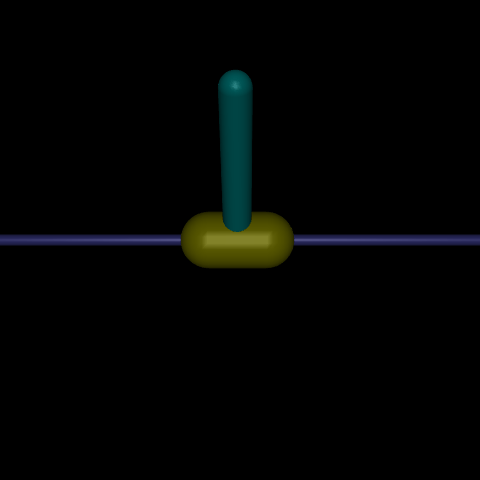

In [ ]:
print (f"Final Eval: {reinforce.eval(20, visualize=True):.2f}")
reinforce.visualize()

11 3


  3%|▎         | 53/2000 [00:03<02:22, 13.69it/s]

Eval Reward: 40.71 at ep 50


  5%|▌         | 104/2000 [00:06<01:43, 18.32it/s]

Eval Reward: 38.85 at ep 100


  8%|▊         | 154/2000 [00:09<01:46, 17.29it/s]

Eval Reward: 39.43 at ep 150


 10%|█         | 202/2000 [00:11<01:40, 17.87it/s]

Eval Reward: 39.16 at ep 200


 13%|█▎        | 253/2000 [00:13<01:31, 19.07it/s]

Eval Reward: 39.03 at ep 250


 15%|█▌        | 304/2000 [00:16<01:47, 15.73it/s]

Eval Reward: 39.15 at ep 300


 18%|█▊        | 352/2000 [00:20<03:13,  8.52it/s]

Eval Reward: 38.91 at ep 350


 20%|██        | 404/2000 [00:23<01:22, 19.42it/s]

Eval Reward: 39.21 at ep 400


 23%|██▎       | 455/2000 [00:25<01:19, 19.51it/s]

Eval Reward: 39.04 at ep 450


 25%|██▌       | 503/2000 [00:27<01:14, 20.03it/s]

Eval Reward: 39.05 at ep 500


 28%|██▊       | 554/2000 [00:29<01:34, 15.31it/s]

Eval Reward: 38.59 at ep 550


 30%|███       | 605/2000 [00:32<01:09, 20.06it/s]

Eval Reward: 39.17 at ep 600


 33%|███▎      | 653/2000 [00:34<01:07, 20.03it/s]

Eval Reward: 38.91 at ep 650


 35%|███▌      | 704/2000 [00:36<01:03, 20.29it/s]

Eval Reward: 38.91 at ep 700


 38%|███▊      | 755/2000 [00:38<01:00, 20.55it/s]

Eval Reward: 38.72 at ep 750


 40%|████      | 803/2000 [00:40<00:58, 20.46it/s]

Eval Reward: 39.01 at ep 800


 43%|████▎     | 853/2000 [00:43<01:12, 15.88it/s]

Eval Reward: 38.47 at ep 850


 45%|████▌     | 903/2000 [00:45<00:52, 20.75it/s]

Eval Reward: 39.21 at ep 900


 48%|████▊     | 952/2000 [00:47<01:09, 15.00it/s]

Eval Reward: 38.86 at ep 950


 50%|█████     | 1005/2000 [00:50<00:50, 19.64it/s]

Eval Reward: 38.89 at ep 1000


 53%|█████▎    | 1053/2000 [00:52<00:44, 21.23it/s]

Eval Reward: 38.28 at ep 1050


 55%|█████▌    | 1104/2000 [00:54<00:53, 16.73it/s]

Eval Reward: 39.02 at ep 1100


 58%|█████▊    | 1155/2000 [00:57<00:42, 19.97it/s]

Eval Reward: 38.69 at ep 1150


 60%|██████    | 1203/2000 [00:59<00:39, 20.18it/s]

Eval Reward: 39.03 at ep 1200


 63%|██████▎   | 1254/2000 [01:01<00:36, 20.29it/s]

Eval Reward: 38.65 at ep 1250


 65%|██████▌   | 1305/2000 [01:03<00:34, 20.09it/s]

Eval Reward: 38.67 at ep 1300


 68%|██████▊   | 1353/2000 [01:05<00:31, 20.61it/s]

Eval Reward: 39.16 at ep 1350


 70%|███████   | 1403/2000 [01:07<00:38, 15.67it/s]

Eval Reward: 39.46 at ep 1400


 73%|███████▎  | 1453/2000 [01:10<00:27, 19.85it/s]

Eval Reward: 39.21 at ep 1450


 75%|███████▌  | 1504/2000 [01:12<00:24, 20.44it/s]

Eval Reward: 39.13 at ep 1500


 78%|███████▊  | 1555/2000 [01:14<00:21, 20.61it/s]

Eval Reward: 38.59 at ep 1550


 80%|████████  | 1603/2000 [01:16<00:19, 20.72it/s]

Eval Reward: 39.23 at ep 1600


 83%|████████▎ | 1654/2000 [01:18<00:16, 20.87it/s]

Eval Reward: 39.40 at ep 1650


 85%|████████▌ | 1704/2000 [01:21<00:18, 15.90it/s]

Eval Reward: 38.93 at ep 1700


 88%|████████▊ | 1754/2000 [01:23<00:11, 20.75it/s]

Eval Reward: 38.86 at ep 1750


 90%|█████████ | 1805/2000 [01:25<00:09, 20.47it/s]

Eval Reward: 38.53 at ep 1800


 93%|█████████▎| 1853/2000 [01:27<00:07, 20.63it/s]

Eval Reward: 38.26 at ep 1850


 95%|█████████▌| 1904/2000 [01:29<00:04, 20.93it/s]

Eval Reward: 39.10 at ep 1900


 98%|█████████▊| 1955/2000 [01:31<00:02, 20.32it/s]

Eval Reward: 39.18 at ep 1950


100%|██████████| 2000/2000 [01:34<00:00, 21.26it/s]

Eval Reward: 38.88 at ep 2000


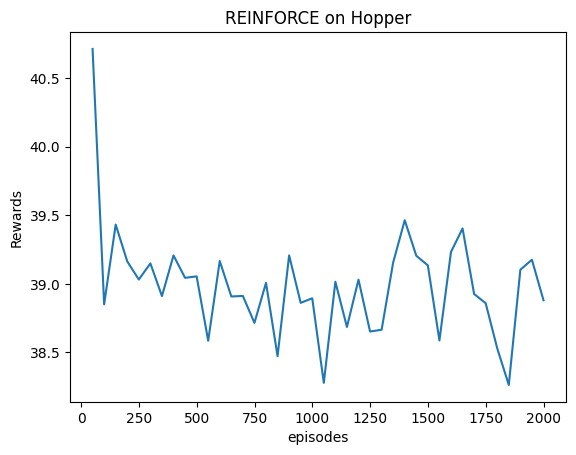

In [ ]:
# Hopper-v4 REINFORCE
gc.collect() # free some unused RAM
env = gym.make("Hopper-v4", render_mode="rgb_array", max_episode_steps=500)
reinforce = REINFORCE(env, "Hopper", Policy, var=0.1, lr=1e-3, gamma=0.98)
reinforce.execute(total_ep=2000, eval_freq=50, eval_ep=10)

Final Eval: 38.73


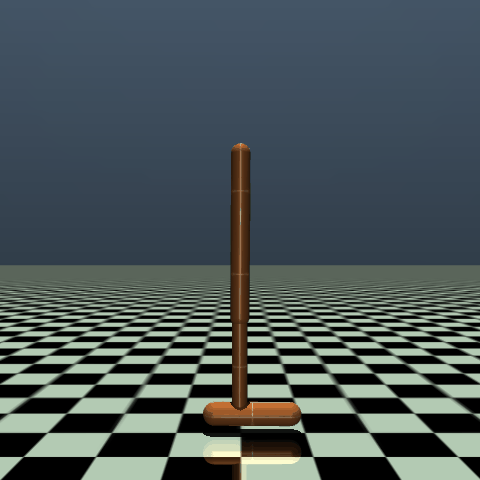

In [ ]:
# evaluate the final policy
print (f"Final Eval: {reinforce.eval(10, visualize=True):.2f}")
reinforce.visualize()

In [ ]:
# HalfCheetah-v4 REINFORCE
gc.collect()
env = gym.make("HalfCheetah-v4", render_mode="rgb_array", max_episode_steps=500)
reinforce = REINFORCE(env, "HalfCheetah", Policy, var=0.05, lr=1e-3, gamma=0.95)
reinforce.execute(total_ep=1000, eval_freq=50, eval_ep=10)

17 6


  2%|▏         | 21/1000 [00:16<13:02,  1.25it/s]


KeyboardInterrupt: ignored

In [ ]:
# evaluate the final policy
print (f"Final Eval: {reinforce.eval(10, visualize=True):.2f}")
reinforce.visualize()

In [ ]:
# image based InvertedPendulum-v4
env = make_image_env("InvertedPendulum-v4")
gc.collect()
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")
reinforce = REINFORCE(env, "InvertedPendulum", Policy_Image, var=0.05, lr=1e-3, gamma=0.95)
reinforce.execute(total_ep=5000, eval_freq=200, eval_ep=10)

#Actor Critic

In [ ]:
# The actor network for numerical states using MLP
class Actor(nn.Module):
    def __init__(
        self,
        state_dim,
        action_dim
    ):
        super(Actor, self).__init__()
        # print(state_dim, action_dim)

        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        x = F.tanh(x) # scale the output to [-1, 1]; And we treat it as the mean value of a (multi-variable) normal distribution
        return x

# The actor network for **image states** using CNN
class Actor_Image(nn.Module):
    def __init__(
        self,
        image_channels,
        action_dim
    ):
        super(Actor_Image, self).__init__()
        # print(state_dim, action_dim)

        super(Actor_Image, self).__init__()
        self.conv1 = nn.Conv2d(image_channels, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.tanh(x) # scale the output to [-1, 1]; And we treat it as the mean value of a (multi-variable) normal distribution
        return x


# The critic network for numerical states using MLP
class Critic(nn.Module):
    def __init__(
        self,
        state_dim
    ):
        super(Critic, self).__init__()
        # print(state_dim, action_dim)
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# The critic network for **image states** using CNN
class Critic_Image(nn.Module):
    def __init__(
        self,
        image_channels
    ):
        super(Critic_Image, self).__init__()
        self.conv1 = nn.Conv2d(image_channels, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# ActorCritic
class ActorCritic():
    def __init__(
        self,
        env,
        env_name,
        actor,
        critic,
        var=0.1,
        var_decay_steps=20000,
        train_freq=4,
        target_network_update_freq=200,
        gamma=0.95,
        lr=1e-3
    ):
        # initlize env and env name
        self.env = env
        self.env_name = env_name

        # set state dimension and number of actions
        self.state_dim = env.observation_space.shape
        self.action_dim = env.action_space.shape[0]

        # create actor and critic networks:
        # for critic, also create a target critic network, because we will use it like DQN
        if len(self.state_dim) > 1:
            # for image based observations, pass the number of channels of the image
            # here we use grayscaled image so it is 1
            self.actor = actor
            self.critic = critic
            self.critic_target = critic
        else:
            # for numerical states
            self.state_dim = self.state_dim[0]
            self.actor = Actor(self.state_dim, self.action_dim)
            self.critic = Critic(self.state_dim)
            self.critic_target = Critic(self.state_dim)


        # initialize the target critic network using the weights from critic network
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())

        # assign gpu if avliable
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # move the models to gpu
        self.actor.to(self.device)
        self.critic.to(self.device)
        self.critic_target.to(self.device)

        # (end) variance value for normal distribution
        self.var = var
        # how many steps epsilon decays from 1 to eps
        self.var_decay_steps = var_decay_steps

        # set optimizers, one each network
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr = lr)
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr = lr)

        # mode is used to switch between optimization of DQN and Evaluation
        self.mode = "eval"
        self.total_transitions = 0

        self.gamma = gamma
        self.g = None
        self.train_freq = train_freq
        self.target_network_update_freq = target_network_update_freq


    # function to choose action given a state
    # return the log probablity of the action as well
    # return values are all tensors (on gpu if using gpu)
    # Hint: for the log probablity you will use .log_prob() of a pytorch distribution class
    def act(self, state):
        if self.mode == "eval":
            with torch.no_grad():
                # for evaluation
                # let us directly use the mean value as the final action
                # for log probablity, we just give a placeholder value of 0.0
                action = self.policy_network(torch.FloatTensor(state).to(self.device).unsqueeze(0))
                log_prob = torch.tensor(0.0).to(self.device)

                return action, log_prob

        elif self.mode == "train":
            # variance of the policy
            # which decays from the initial high value (1) to final value (self.var)
            # this is similar to epsilon decay in DQN
            if self.total_transitions < self.var_decay_steps:
                var = (self.var_decay_steps-self.total_transitions) / self.var_decay_steps * (1 - self.var) + self.var
            else:
                var = self.var

            # we create a normal distribution for action
            # where the mean is the output from the policy network
            # the variance is a constant value
            # (or a value decreases together with eps)
            # Hint: we will use the distribution classes in pytorch
            # "from torch.distributions.normal import Normal" (which is already imported far ahead)
            mean = self.policy_network(state)
            var = torch.tensor(var).to(self.device)
            normal_dist = torch.distributions.Normal(mean, var)

            # sample from the normal distribution as the action
            action = normal_dist.sample()

            # let us clip the action to range [-1, 1] in case environment does not accept that
            action = torch.clip(action, -1, 1)

            # get the log probablity of that action according to the normal distribution
            log_prob = normal_dist.log_prob(action)

        return action, log_prob

    # optimization
    def optimization(self, log_probs, states, next_states, rewards, not_dones):
        # put the models into training mode
        self.actor.train()
        self.critic.train()


        # make each list of tensors to a large pytorch tensor for optimization
        # here we give the example of log_probs and you will responsible for the rest
        log_probs = torch.cat(log_probs, dim=0)
        states = torch.cat(states, dim=0)
        next_states = torch.cat(next_states, dim=0)
        rewards = torch.cat(rewards, dim=0)
        not_dones = torch.cat(not_dones, dim=0)

        # compute value v(s) and v(s') using critic
        # and advantage
        # Hint: v(s') is from target critic and should not have gradient.
        # Use with torch.no_grad() properly
        with torch.no_grad():
            value_next = self.critic_target(next_states)



        # compute actor loss
        # Hint: log_probs is in size (T, action_dim)
        # we should make it to (T, 1) by taking the mean on the action dimension
        # For the final loss, it can be a sum or mean of all the steps, depending on your choice
        # Hint2: to compute the actor loss, we should prevent from gradient flowing into critic through advantage
        # we should use .detach() on advantage
        advantage = rewards + self.gamma * value_next * not_dones - self.critic(states).detach()
        actor_loss = torch.mean(log_probs * advantage)

        # optimize the actor using actor loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # compute critic loss
        value = self.critic(states)
        critic_loss = F.mse_loss(value, rewards + self.gamma * value_next * not_dones)


        # optimize the critic network (not the target critic!)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()


        # update the target critic network based on critic network paramters every self.target_network_update_freq steps
        if self.total_transitions % self.target_network_update_freq == 0:
            self.critic_target.load_state_dict(self.critic.state_dict())


    # run for one episode
    def run_one_episode(self, visualize=False):
        self.g = GIFMaker()

        terminated = False
        r = 0

        # make empty lists to hold state, next state, stepwise reward, log probabilities, and not_done
        states = []
        next_states = []
        rewards = []
        log_probs = []
        not_dones = []


        # reset
        state, info = self.env.reset()

        if visualize:
            self.g.append(env.render())

        while not terminated:
            # make state to tensor, add a batch dimension, and move it to gpu
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(self.device)

            # select (sample) an action and get its log probability
            action_tensor, log_prob_tensor = self.act(state_tensor)


            # convert action to numpy array for using it in environment
            action = action_tensor.cpu().detach().squeeze(0).numpy()

            # go to next state using that action
            next_state, reward, terminated, info = self.env.step(action)

            r += reward

            # for rendering
            if visualize:
                self.g.append(env.render())

            # create tensors for next_state, reward, and not_done
            # remember the batch dimension
            # and move them to gpu
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0).to(self.device)
            reward_tensor = torch.tensor([reward], dtype=torch.float32).to(self.device)
            not_done_tensor = torch.tensor([not terminated], dtype=torch.float32).to(self.device)

            if self.mode == "train":
                self.total_transitions += 1

                # if training, append the transition (log probabilities, states, next_states, rewards and not dones)
                # to the lists holding them
                log_probs.append(log_prob_tensor)
                states.append(state_tensor)
                next_states.append(next_state_tensor)
                rewards.append(reward_tensor)
                not_dones.append(not_done_tensor)

                # every time we need to train or the trajectory ends
                if (self.total_transitions % self.train_freq) or terminated or truncated:

                    # call optimization
                    self.optimization(log_probs, states, next_states, rewards, not_dones)

                    # reset the lists for holding transitions back to empty lists
                    log_probs = []
                    states = []
                    next_states = []
                    rewards = []
                    not_dones = []

            # terminated then return
            if terminated or truncated:
                return r

            # don't forget to assign next_state to state for the next loop
            state = next_state

    def train(self):
        self.mode = "train"
        self.run_one_episode()

    # Evaluation of policy
    def eval(self, n, visualize=False):
        self.mode = "eval" # put in eval mode
        returns = []
        for i in range(n):                          # run evaluation for n episode
            returns.append(self.run_one_episode(visualize))
        return np.mean(returns)                    # return average returns over niter episodes


    # the function called to perform optimization and evaluation
    def execute(self, total_ep=5000, eval_freq=100, eval_ep=100):
        rewards = []   #used to track polciy evaluation across runs
        episodes = []  #number of episodes used to update policy

        prog_bar = tqdm(range(0, total_ep))
        for i in prog_bar:
            self.train()                        # train
            if (i+1) % eval_freq == 0:          # evaluate using eval_ep episodes every eval_freq policy updates
                reward = self.eval(eval_ep)
                rewards.append(reward)
                episodes.append(i)
                print (f"Eval Reward: {reward:.2f} at ep {i+1}")

        plt.plot(episodes, rewards)   #plot evaluation reward vs episodes
        plt.xlabel('episodes')
        plt.ylabel('Rewards')
        plt.title('Actor Critic on '+self.env_name)
        plt.show()

    def visualize(self):
        self.g.display()

In [ ]:
# InvertedPendulum-v4 Actor-Critic
gc.collect()
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")
ac = ActorCritic(env, "InvertedPendulum", Actor, Critic, var=0.1, lr=1e-3, train_freq=64)
ac.execute(total_ep=5000, eval_freq=200, eval_ep=20)

In [ ]:
print (f"Final Eval: {ac.eval(20, visualize=True):.2f}")
ac.visualize()

In [ ]:
# Hopper-v4 Actor-Critic
gc.collect()
env = gym.make("Hopper-v4", render_mode="rgb_array")
ac = ActorCritic(env, "Hopper", Actor, Critic, var=0.1, lr=1e-3, train_freq=32)
ac.execute(total_ep=5000, eval_freq=200, eval_ep=10)

In [ ]:
print (f"Final Eval: {ac.eval(10, visualize=True):.2f}")
ac.visualize()

In [ ]:
# HalfCheetah-v4 Actor-Critic
gc.collect()
env = gym.make("HalfCheetah-v4", render_mode="rgb_array")
ac = ActorCritic(env, "HalfCheetah", Actor, Critic, var=0.1, , lr=1e-3, train_freq=32, gamma=0.99)
ac.execute(total_ep=600, eval_freq=50, eval_ep=10)

In [ ]:
print (f"Final Eval: {ac.eval(10, visualize=True):.2f}")
ac.visualize()

In [ ]:
# image based InvertedPendulum-v4 Actor-Critic
env = make_image_env("InvertedPendulum-v4")
gc.collect()
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")
ac = ActorCritic(env, "InvertedPendulum", Actor_Image, Critic_Image, var=0.05, lr=1e-3, train_freq=32, gamma=0.95)
ac.execute(total_ep=5000, eval_freq=200, eval_ep=10)

In [ ]:
print (f"Final Eval: {ac.eval(10, visualize=True):.2f}")
ac.visualize()